Deep Learning Lab Module 1
Raiyan Khan
22WU0104095

Training Features (X_train):
 [[ 9.28167783e-01  1.32606716e+00  6.68025202e-02]
 [ 9.28167783e-01 -7.54109620e-01 -2.72964097e-01]
 [ 9.28167783e-01 -7.54109620e-01 -1.15080322e-03]
 [ 9.28167783e-01 -7.54109620e-01  2.02709167e-01]
 [-2.65489433e-01 -7.54109620e-01 -3.40917420e-01]]
Training Labels (y_train):
 [1 0 0 0 0]

Testing Features (X_test):
 [[-0.26548943 -0.75410962  0.81428908]
 [-0.26548943 -0.75410962 -1.83589054]
 [-0.26548943  1.32606716 -0.06910413]
 [-1.45914665  1.32606716 -0.40887074]
 [ 0.92816778 -0.75410962  0.8822424 ]]
Testing Labels (y_test):
 [0 1 1 1 0]

Accuracy: 0.7832


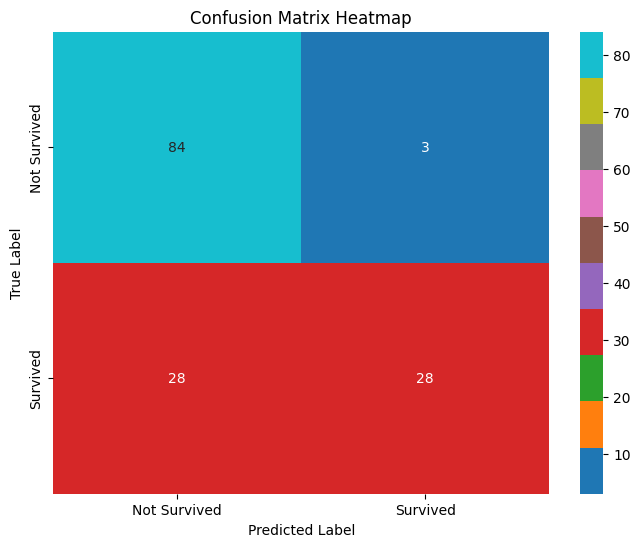

In [ ]:
#Experiment 1: Implementation of a single artificial neuron.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocessing: Select relevant columns and handle missing values
data = data[['Pclass', 'Sex', 'Age', 'Survived']].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Split into features and target variable
X = data[['Pclass', 'Sex', 'Age']].values  # Features
y = data['Survived'].values   # Target variable (Survived)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the input and output values for both training and testing sets
print("Training Features (X_train):\n", X_train[:5])  # Show first 5 rows of features for training
print("Training Labels (y_train):\n", y_train[:5])    # Show first 5 labels for training
print("\nTesting Features (X_test):\n", X_test[:5])    # Show first 5 rows of features for testing
print("Testing Labels (y_test):\n", y_test[:5])        # Show first 5 labels for testing

# Initialize and train the perceptron model
model = Perceptron(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="tab10", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix Heatmap")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


AND Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1

OR Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


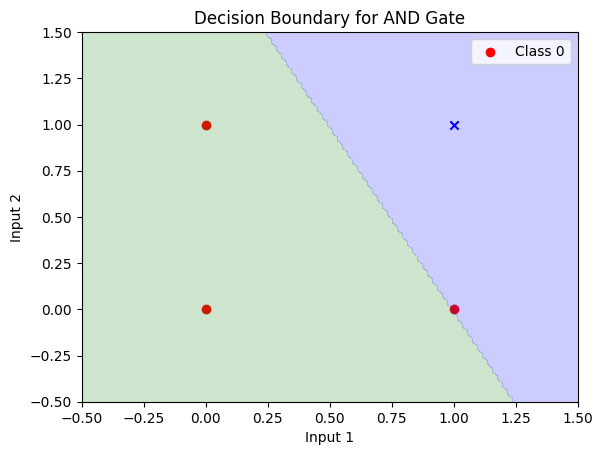

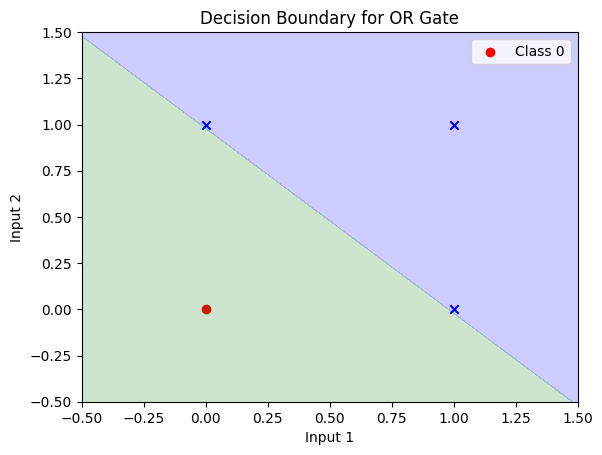

In [ ]:
# Experiment 2: Implementation of Single Layer Perceptron (SLP).

import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Add bias input (always 1)
        x_with_bias = np.insert(x, 0, 1)
        return self.activation_function(np.dot(self.weights, x_with_bias))

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                x_with_bias = np.insert(X[i], 0, 1)  # Add bias input
                y_pred = self.activation_function(np.dot(self.weights, x_with_bias))
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * x_with_bias

    def plot_decision_boundary(self, X, y, title):
        # Plot data points
        for i in range(len(y)):
            if y[i] == 0:
                plt.scatter(X[i][0], X[i][1], color='red', marker='o', label='Class 0' if i == 0 else "")
            else:
                plt.scatter(X[i][0], X[i][1], color='blue', marker='x', label='Class 1' if i == 0 else "")

        # Plot decision boundary
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        predictions = np.array([self.predict(point) for point in grid])
        zz = predictions.reshape(xx.shape)
        plt.contourf(xx, yy, zz, levels=[-1, 0, 1], alpha=0.2, colors=('green', 'blue'))

        plt.title(title)
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.legend()
        plt.show()

# Training data for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Training data for OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Create perceptrons for AND and OR gates
and_perceptron = Perceptron(input_size=2)
or_perceptron = Perceptron(input_size=2)

# Train perceptrons
and_perceptron.train(X_and, y_and)
or_perceptron.train(X_or, y_or)

# Test the perceptrons
print("AND Gate:")
for x in X_and:
    print(f"Input: {x}, Output: {and_perceptron.predict(x)}")

print("\nOR Gate:")
for x in X_or:
    print(f"Input: {x}, Output: {or_perceptron.predict(x)}")

# Plot decision boundaries
and_perceptron.plot_decision_boundary(X_and, y_and, "Decision Boundary for AND Gate")
or_perceptron.plot_decision_boundary(X_or, y_or, "Decision Boundary for OR Gate")


AND Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1

OR Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


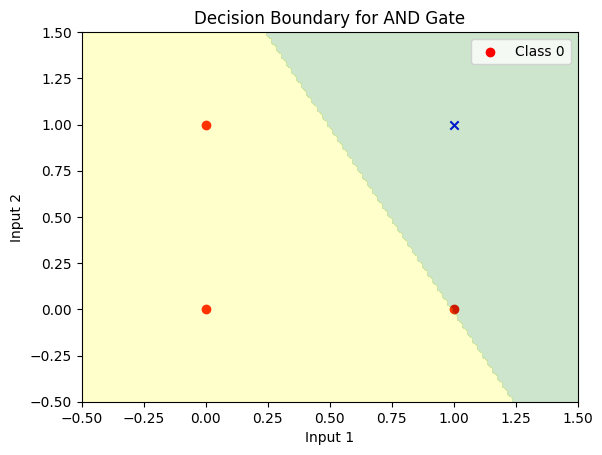

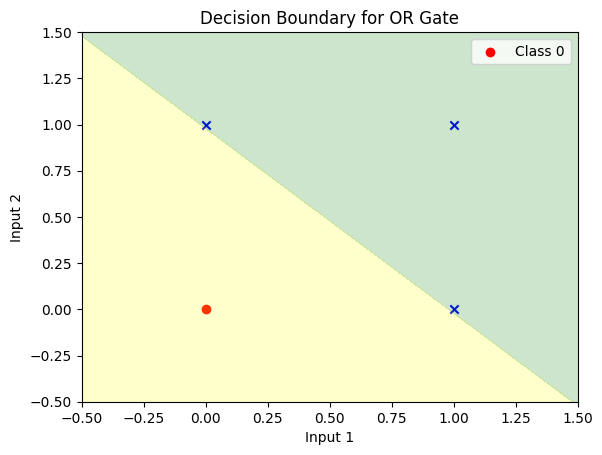

In [ ]:
# implementation of single layer perceptron for logical gates AND & OR
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Add bias input (always 1)
        x_with_bias = np.insert(x, 0, 1)
        return self.activation_function(np.dot(self.weights, x_with_bias))

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                x_with_bias = np.insert(X[i], 0, 1)  # Add bias input
                y_pred = self.activation_function(np.dot(self.weights, x_with_bias))
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * x_with_bias

    def plot_decision_boundary(self, X, y, title):
        # Plot data points
        for i in range(len(y)):
            if y[i] == 0:
                plt.scatter(X[i][0], X[i][1], color='red', marker='o', label='Class 0' if i == 0 else "")
            else:
                plt.scatter(X[i][0], X[i][1], color='blue', marker='x', label='Class 1' if i == 0 else "")

        # Plot decision boundary
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        predictions = np.array([self.predict(point) for point in grid])
        zz = predictions.reshape(xx.shape)
        plt.contourf(xx, yy, zz, levels=[-1, 0, 1], alpha=0.2, colors=('yellow', 'green'))

        plt.title(title)
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.legend()
        plt.show()

# Training data for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Training data for OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Create perceptrons for AND and OR gates
and_perceptron = Perceptron(input_size=2)
or_perceptron = Perceptron(input_size=2)

# Train perceptrons
and_perceptron.train(X_and, y_and)
or_perceptron.train(X_or, y_or)

# Test the perceptrons
print("AND Gate:")
for x in X_and:
    print(f"Input: {x}, Output: {and_perceptron.predict(x)}")

print("\nOR Gate:")
for x in X_or:
    print(f"Input: {x}, Output: {or_perceptron.predict(x)}")

# Plot decision boundaries
and_perceptron.plot_decision_boundary(X_and, y_and, "Decision Boundary for AND Gate")
or_perceptron.plot_decision_boundary(X_or, y_or, "Decision Boundary for OR Gate")


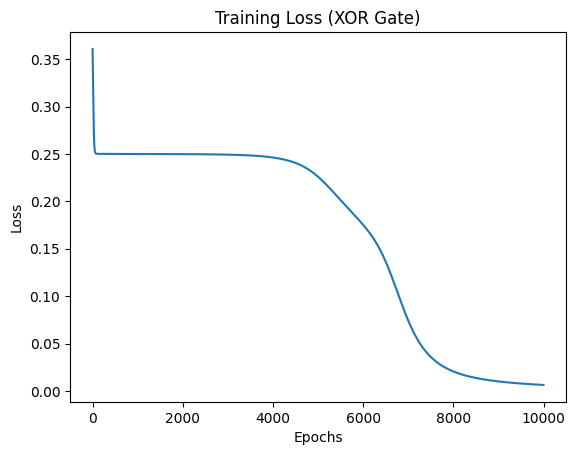

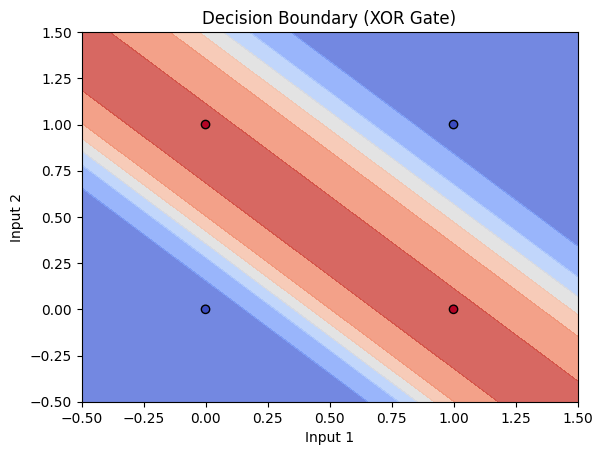

In [ ]:
#Experiment 3: Multi-Layer Perceptron (MLP) for XOR Gate.

import numpy as np
import matplotlib.pyplot as plt

# XOR Gate Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Define MLP with 2 layers
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.1):
        self.w1 = np.random.rand(input_dim, hidden_dim)
        self.b1 = np.random.rand(hidden_dim)
        self.w2 = np.random.rand(hidden_dim, output_dim)
        self.b2 = np.random.rand(output_dim)
        self.lr = lr

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        self.z1 = np.dot(inputs, self.w1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, inputs, targets):
        output_error = targets - self.a2
        output_delta = output_error * self.sigmoid_derivative(self.a2)

        hidden_error = np.dot(output_delta, self.w2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.a1)

        self.w2 += self.lr * np.dot(self.a1.T, output_delta)
        self.b2 += self.lr * output_delta.sum(axis=0)
        self.w1 += self.lr * np.dot(inputs.T, hidden_delta)
        self.b1 += self.lr * hidden_delta.sum(axis=0)

    def train(self, X, y, epochs):
        loss_history = []
        for _ in range(epochs):
            self.forward(X)
            loss = ((y - self.a2) ** 2).mean()  # Mean Squared Error
            loss_history.append(loss)
            self.backward(X, y)
        return loss_history

# Train the model
mlp = MLP(input_dim=2, hidden_dim=2, output_dim=1, lr=0.1)
loss_history = mlp.train(X, y_xor.reshape(-1, 1), epochs=10000)

# Plot training loss
plt.plot(loss_history)
plt.title("Training Loss (XOR Gate)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Visualize decision boundaries
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([mlp.forward(point) for point in grid]).reshape(-1)
plt.contourf(xx, yy, predictions.reshape(xx.shape), alpha=0.8, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y_xor, edgecolors="k", cmap="coolwarm")
plt.title("Decision Boundary (XOR Gate)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()



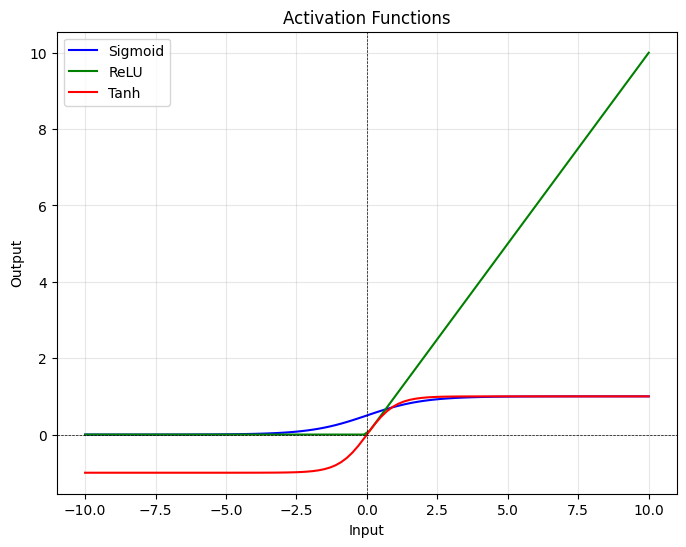

In [ ]:
#Experiment 4: Activation Functions

import matplotlib.pyplot as plt
import numpy as np

# Define activation functions
x = np.linspace(-10, 10, 100)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Plot activation functions
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid(x), label="Sigmoid", color='blue')
plt.plot(x, relu(x), label="ReLU", color='green')
plt.plot(x, tanh(x), label="Tanh", color='red')
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


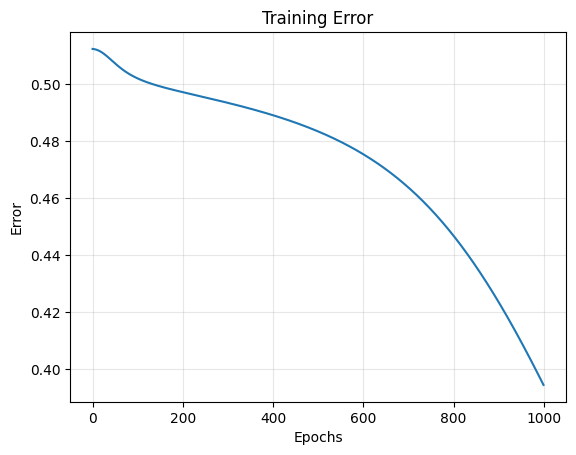

In [ ]:
# Experiment 5: Forward and Backpropagation.

inputs = np.array([[0, 1], [1, 1]])
targets = np.array([[1], [0]])

# Initialize weights and biases
np.random.seed(42)
weights1 = np.random.rand(2, 2)
bias1 = np.random.rand(2)
weights2 = np.random.rand(2, 1)
bias2 = np.random.rand(1)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Forward propagation
def forward(inputs):
    z1 = np.dot(inputs, weights1) + bias1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, weights2) + bias2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Backpropagation
def backward(inputs, targets, z1, a1, z2, a2):
    global weights1, bias1, weights2, bias2
    output_error = targets - a2
    output_delta = output_error * sigmoid_derivative(a2)

    hidden_error = np.dot(output_delta, weights2.T)
    hidden_delta = hidden_error * sigmoid_derivative(a1)

    weights2 += np.dot(a1.T, output_delta) * 0.1
    bias2 += output_delta.sum(axis=0) * 0.1
    weights1 += np.dot(inputs.T, hidden_delta) * 0.1
    bias1 += hidden_delta.sum(axis=0) * 0.1

    return output_error

# Train the network
errors = []
for epoch in range(1000):
    z1, a1, z2, a2 = forward(inputs)
    error = backward(inputs, targets, z1, a1, z2, a2)
    errors.append(np.mean(np.abs(error)))

# Plot training error
plt.plot(errors)
plt.title("Training Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid(alpha=0.3)
plt.show()
